<center>
<h1>Fake news detection using graph neural network</h1>
<h2>SAGE GNN</h2>
<i><h6>Victor GOUBET | Nicholas Tagliapietra | Asma Bakhtiariazad</h6></i>
</center>


----

# Library

In [1]:
import torch
import pickle as pk
import torch.nn.functional as F

from torch.nn import Linear, LogSoftmax
from tool_box.upfd_dataset import ext_UPFD
from tool_box.GNN_train import plot_hist, train_all_and_optimize
from torch_geometric.nn import SAGEConv, global_mean_pool, global_max_pool

# Import datasets

In [2]:
datasets = pk.load(open('../data/datasets.pkl', 'rb'))

# Define the model

In [3]:
class SAGE(torch.nn.Module):
    
    
    def __init__(self, num_n_feature, num_g_feature, emb_size, num_layers=2):
        super(SAGE, self).__init__()
        torch.manual_seed(42)
        self.emb_size = emb_size
        
        self.convs = torch.nn.ModuleList()
        for i in range(num_layers):
            size_in = num_n_feature if i == 0 else emb_size
            self.convs.append(SAGEConv(size_in, emb_size))

        # check if we have graph features to concatenate or not
        i = 2
        if num_g_feature:
             self.lin_g = Linear(num_g_feature, emb_size)
             i = 3

        self.out_layer = Linear(i * emb_size, 2)
        self.act = LogSoftmax(dim=-1)


    
    def forward(self, x, edges_idx, batch_idx, g_features):
        for i, conv in enumerate(self.convs):
            x = conv(x, edges_idx)
            if i != len(self.convs) - 1:
                x = x.relu()
                x = F.dropout(x, p=0.5, training=self.training)
            else:
                
                flatten = torch.cat([global_mean_pool(x, batch_idx),
                                     global_max_pool(x, batch_idx)], axis=1)

                if g_features.size()[-1] > 1:
                    g_ft = self.lin_g(g_features)
                    flatten = torch.cat([flatten, g_ft], axis=1)

                out = self.act(self.out_layer(flatten))
                
        return out

# Training

In [4]:
models = train_all_and_optimize(SAGE, datasets, epochs = 60)

[I 2022-01-05 22:20:44,257] A new study created in memory with name: no-name-8d7950d0-0e26-48e8-930f-e094014c680c


--> Train on: origin


[I 2022-01-05 22:21:01,540] Trial 0 finished with value: 0.9136029411764707 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.005, 'batch_size': 128, 'embedding_space_dim': 80}. Best is trial 0 with value: 0.9136029411764707.
[I 2022-01-05 22:21:16,934] Trial 1 finished with value: 0.8317440257352942 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.005, 'batch_size': 512, 'embedding_space_dim': 140}. Best is trial 0 with value: 0.9136029411764707.
[I 2022-01-05 22:21:29,929] Trial 2 finished with value: 0.8257697610294117 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.01, 'batch_size': 512, 'embedding_space_dim': 100}. Best is trial 0 with value: 0.9136029411764707.
[I 2022-01-05 22:21:44,135] Trial 3 finished with value: 0.9145986519607843 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.005, 'batch_size': 256, 'embedding_space_dim': 120}. Best is trial 3 with value: 0.9145986519607843.
[I 2022-01-05 22:21:53,608] Trial 4 finished with value: 0.

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.28949815332889556  loss_val=0.34190061688423157 | acc_train=0.8785845588235294  acc_val=0.8663449754901961
Epochs: 20 | loss_train=0.22384991943836213  loss_val=0.27422742048899335 | acc_train=0.9118566176470588  acc_val=0.8989736519607843
Epochs: 30 | loss_train=0.14812607318162918  loss_val=0.3440181116263072 | acc_train=0.9480238970588235  acc_val=0.8813572303921569
Epochs: 40 | loss_train=0.12442366033792496  loss_val=0.2024394025405248 | acc_train=0.9566176470588236  acc_val=0.9126072303921569
Epochs: 50 | loss_train=0.11978407949209213  loss_val=0.20335305233796439 | acc_train=0.9572150735294118  acc_val=0.9276194852941176
Epochs: 60 | loss_train=0.13484710901975633  loss_val=0.184217631816864 | acc_train=0.9509191176470588  acc_val=0.9302236519607843


[I 2022-01-05 22:23:03,245] A new study created in memory with name: no-name-f045590b-592d-4568-b172-165cf28ead66


--> Train on: dataset1


[I 2022-01-05 22:23:16,845] Trial 0 finished with value: 0.8571920955882353 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.001, 'batch_size': 512, 'embedding_space_dim': 100}. Best is trial 0 with value: 0.8571920955882353.
[I 2022-01-05 22:23:31,243] Trial 1 finished with value: 0.8331801470588235 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.001, 'batch_size': 256, 'embedding_space_dim': 120}. Best is trial 0 with value: 0.8571920955882353.
[I 2022-01-05 22:23:47,335] Trial 2 finished with value: 0.8467830882352942 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.001, 'batch_size': 128, 'embedding_space_dim': 120}. Best is trial 0 with value: 0.8571920955882353.
[I 2022-01-05 22:23:59,183] Trial 3 finished with value: 0.8303308823529412 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.005, 'batch_size': 128, 'embedding_space_dim': 60}. Best is trial 0 with value: 0.8571920955882353.
[I 2022-01-05 22:24:09,154] Trial 4 finished with value: 0.7

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=1.2143828471501668  loss_val=3.026108980178833 | acc_train=0.7486213235294118  acc_val=0.5078125
Epochs: 20 | loss_train=0.7055411140124003  loss_val=0.6457449197769165 | acc_train=0.7173713235294118  acc_val=0.7974494485294117
Epochs: 30 | loss_train=0.4071475664774577  loss_val=0.45717495679855347 | acc_train=0.8380055147058824  acc_val=0.8023322610294117
Epochs: 40 | loss_train=0.46433911720911664  loss_val=0.438192754983902 | acc_train=0.7906326593137255  acc_val=0.8346737132352942
Epochs: 50 | loss_train=0.4881347417831421  loss_val=0.36969585716724396 | acc_train=0.7939261642156863  acc_val=0.8454159007352942
Epochs: 60 | loss_train=0.3586703936258952  loss_val=0.389311820268631 | acc_train=0.8513710171568628  acc_val=0.8571920955882353


[I 2022-01-05 22:25:07,887] A new study created in memory with name: no-name-f4731e33-c515-457f-a48d-ea249f1a1730


--> Train on: dataset2


[I 2022-01-05 22:25:25,577] Trial 0 finished with value: 0.8170036764705882 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.005, 'batch_size': 128, 'embedding_space_dim': 120}. Best is trial 0 with value: 0.8170036764705882.
[I 2022-01-05 22:25:37,573] Trial 1 finished with value: 0.8037683823529411 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.001, 'batch_size': 128, 'embedding_space_dim': 60}. Best is trial 0 with value: 0.8170036764705882.
[I 2022-01-05 22:25:47,397] Trial 2 finished with value: 0.8161764705882352 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.005, 'batch_size': 256, 'embedding_space_dim': 60}. Best is trial 0 with value: 0.8170036764705882.
[I 2022-01-05 22:26:02,729] Trial 3 finished with value: 0.8025735294117646 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.005, 'batch_size': 128, 'embedding_space_dim': 100}. Best is trial 0 with value: 0.8170036764705882.
[I 2022-01-05 22:26:16,204] Trial 4 finished with value: 0

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.4983666777610779  loss_val=0.907060424486796 | acc_train=0.8037683823529411  acc_val=0.51953125
Epochs: 20 | loss_train=0.40949852466583253  loss_val=0.4420391122500102 | acc_train=0.8338694852941175  acc_val=0.8240655637254902
Epochs: 30 | loss_train=0.3654282927513123  loss_val=0.44700531164805096 | acc_train=0.8579044117647058  acc_val=0.8030790441176471
Epochs: 40 | loss_train=0.34837368726730344  loss_val=0.36538802087306976 | acc_train=0.8696231617647058  acc_val=0.8606004901960785
Epochs: 50 | loss_train=0.3981384992599487  loss_val=0.39659659067789715 | acc_train=0.8397518382352942  acc_val=0.8416053921568628
Epochs: 60 | loss_train=0.3571619987487793  loss_val=0.3652053078015645 | acc_train=0.8594209558823529  acc_val=0.8318014705882352


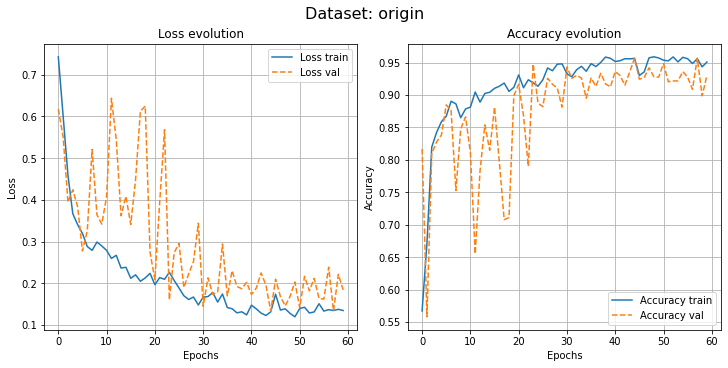

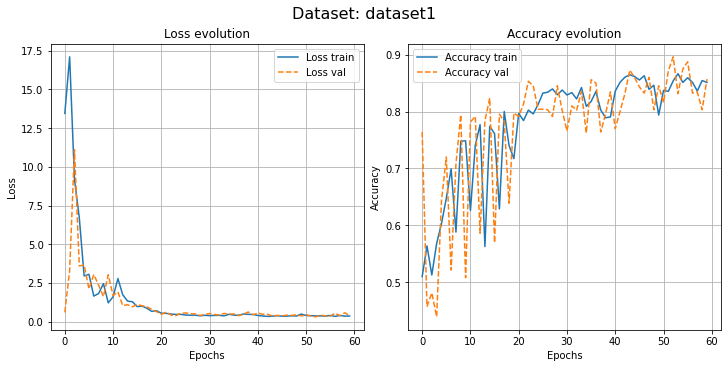

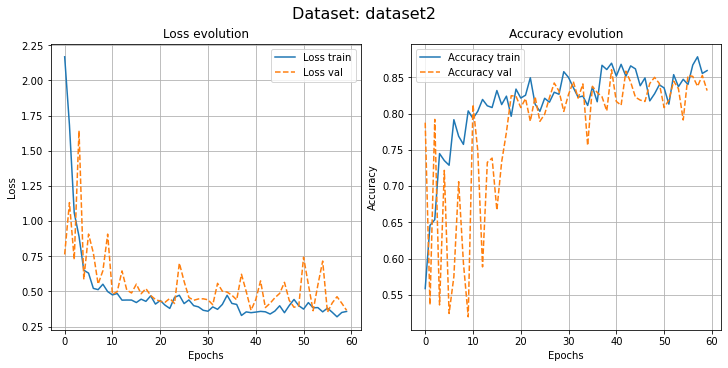

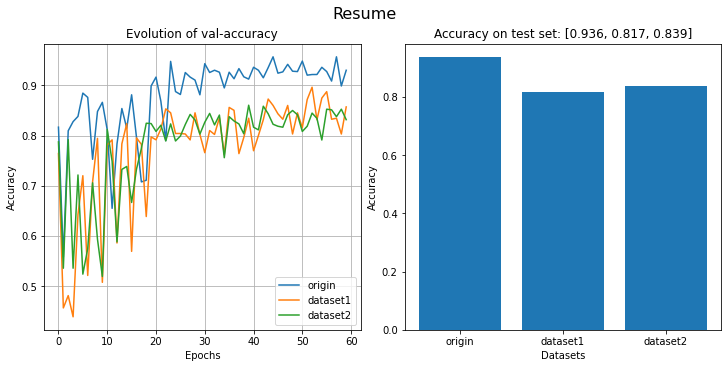

In [5]:
plot_hist(models)

# Save the three models

In [6]:
path = '../models/SAGE/'
for name, model, _, _ in models:
    torch.save(model, f'{path}SAGE_{name}')